In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Creating syntethetic data points
from sklearn.datasets import make_classification


In [19]:
X,y  = make_classification(n_samples = 1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [20]:
X

array([[-0.61382827,  1.43188049],
       [-0.90797171,  0.65295316],
       [ 0.04211049,  2.61745647],
       ...,
       [-1.46587986,  0.71666545],
       [-0.82203947,  1.02988222],
       [ 0.60052969, -1.25643826]], shape=(1000, 2))

In [21]:
y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

<Axes: xlabel='0', ylabel='1'>

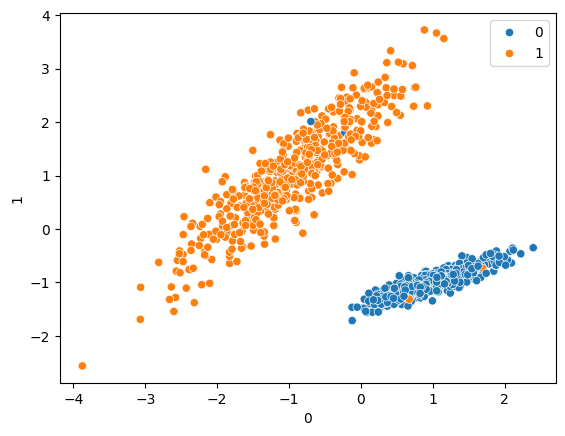

In [22]:
sns.scatterplot(x = pd.DataFrame(X)[0],y =pd.DataFrame(X)[1],hue = y)

In [32]:
from sklearn.model_selection import train_test_split
X_train ,  X_test ,y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC(kernel= 'linear')

In [35]:
svc.fit(X_train , y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
y_pred = svc.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [41]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.99      1.00       131

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[119   0]
 [  1 130]]
0.996


### Classification with more than 1 Cluster

In [43]:
X,y  = make_classification(n_samples = 1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

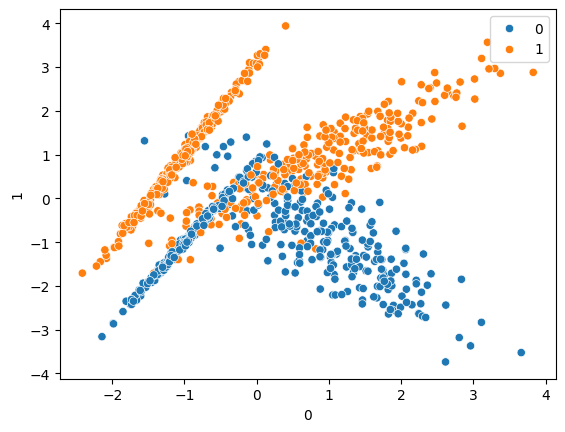

In [44]:
sns.scatterplot(x = pd.DataFrame(X)[0],y =pd.DataFrame(X)[1],hue = y)

In [45]:
from sklearn.model_selection import train_test_split
X_train ,  X_test ,y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [46]:
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       118
           1       0.88      0.79      0.83       132

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.84      0.83      0.83       250

[[104  14]
 [ 28 104]]
0.832


##### Note: With linear SVC , the accuracy reduces because the data is not linearly seperable

In [48]:
## For rbf kernel
svc = SVC(kernel= 'rbf')
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       118
           1       0.95      0.85      0.90       132

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112   6]
 [ 20 112]]
0.896


In [52]:
## For rbf kernel
svc = SVC(kernel='rbf')
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       118
           1       0.95      0.85      0.90       132

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[112   6]
 [ 20 112]]
0.896


#### Hyper Parameter Tunning

In [53]:
from sklearn.model_selection import GridSearchCV
params = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [54]:
grid = GridSearchCV(SVC(),param_grid=params , refit = True , cv = 5 , verbose = 3)

In [55]:
grid.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [56]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [58]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       118
           1       0.95      0.89      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112   6]
 [ 15 117]]
0.916
